In [1]:
#Import des librairies
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Connexion au G Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#Import du csv
filename = r'/content/drive/MyDrive/Colab/fighters.csv'
import csv
open(filename)
data = pd.read_csv(r'/content/drive/MyDrive/Colab/fighters.csv');
data

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Unknown,Unknown,Germany
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8,1,0,50%,Orthodox,28,5.74 ft (1.75 m),Unknown,Unknown
2756,arthur abraham,47,6,0,56.6%,Orthodox,42,5.74 ft (1.75 m),72.05 inches (183 cm),Germany
2757,victor abraham,24,15,0,20.5%,Orthodox,66,5.71 ft (1.74 m),70.08 inches (178 cm),United States
2758,reiya abe,16,2,1,42.1%,Southpaw,29,Unknown,Unknown,Japan


**Jeu de données** : Matches de Boxe


---
**Problèmatique** : Est-ce qu'il y a des caractèristiques qui facilitent la victoire d'un fighter ?



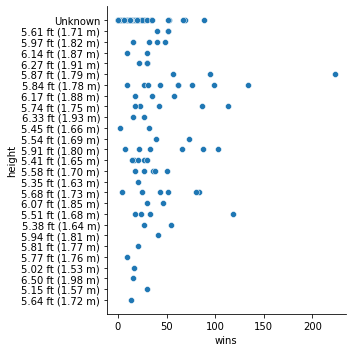

In [4]:
#Continue
data_wins = data.sample(n=200)
sb.relplot(data=data_wins, x="wins", y="height")

Pour ce diagramme à nuage de points nous pouvons regarder comment se comporte la colonne wins par rapport à la taille du fighter (height). Nous constatons ainsi que nous pouvons avoir un fighter de petite taille (1.65 par exemple) qui possède environ 140 matchs gagnés alors qu'un autre fighter de plus grande taille (1.97 par exemple) a gagné 25 matchs.

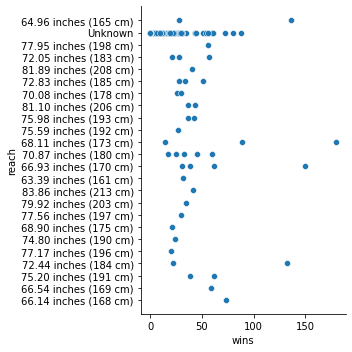

In [14]:
#Continue
data_reach = data.sample(n=100)
sb.relplot(data=data_reach, x="wins", y="reach")

Pour ce qui concerce ce diagramme, nous pouvons constater que le "reach" ou l'allonge d'un fighter n'influence pas sur les matchs gagnés.

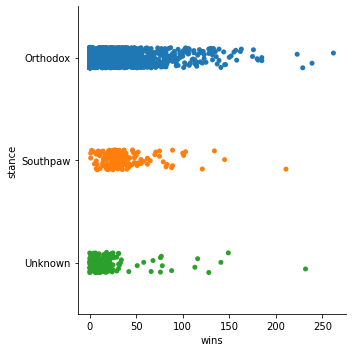

In [31]:
sb.catplot(data=data, x="wins", y="stance")

Ici nous constatons que la garde "orthodox" est plus utilisé que la "southpaw" mais nous devons filtrer ces données afin d'identifier des éventuelles données aberrantes.

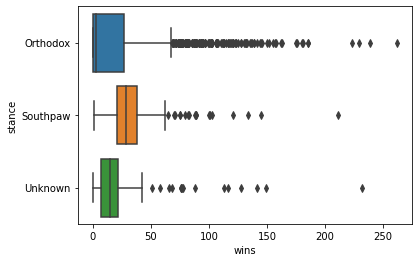

In [28]:
sb.boxplot(data=data, x="wins", y="stance")

On peut voir que nous avons des données aberrantes : cela est dû aux combattants qui ont fait plus de matchs ou les meilleurs.

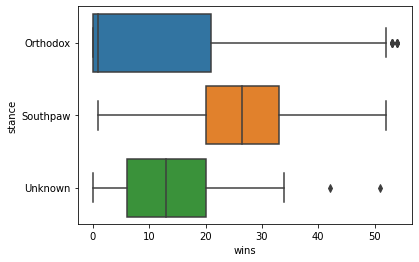

In [35]:
data_stance = data[ data['wins'] < 55 ]
sb.boxplot(data=data_stance, x="wins", y = "stance")

Après avoir enlevé ces données aberrantes, nous pouvons constater que la moyenne de victoires de ceux qui utilisent une garde "southpaw" est supérieure à celle des fighters qui utilisent l' "orthodox".

Pour conclure, on peut dire que nous pouvons pas dire qu'une caractéristique X d'un fighter influence sur son nombre de victoires. 
Ceci est expliquable car un match se déroule entre deux fighters de plus ou moins la même taille et même poids.
La seule caractéristique, en moyenne, qui influence le nombre de victoire est la garde car nous avons plus de victoires pour ceux qui utilisent le southpaw par rapport à l'orthodox.
On peut aussi dire que la victoire d'un match est déterminé par la prouesse et la technique du fighter en question.